# Welcome to Introduction to python
**V.0.1 - Alpha testing, [contributions](#contributions)**

Congratulations, if you are viewing this Jupyter notebook, you have already acquired many of the skills necessary to excel in this course and you are well on your way to learning cutting-edge methods for cognitive neuroscience!

In this course we will use a variety of tools, many of which will likely be new to you. Don't worry if you are having trouble wrapping your head around them now: by the end of this course you will be an expert in not only these useful skills but also the exciting methods that use them. 


## BrainIAK
The Brain Imaging Analysis Kit (BrainIAK) is a freshly developed, open source toolbox coming out of a collaboration between computer scientists and neuroscientists. It uses recent advances in machine learning and high-performance parallel computing to bring analyses that might have previously taken months down to seconds. BrainIAK contains a number of advanced tools that cannot be found anywhere else. We will cover these tools extensively so that by the end of the course you will be conducting some of the most sophisticated fMRI analyses currently possible.

A good introduction to BrainIAK comes from a recent Nature Neuroscience review:

- Cohen, J.D., Daw, N., Engelhardt, B., Hasson, U., Li, K., Niv, Y., Norman, K.A., Pillow, J., Ramadge, P.J., Turk-Browne, N.B. and Willke, T.L., (2017). Computational approaches to fMRI analysis. Nature Neuroscience, 20(3), 304-313.

## Goal of this script
    1. Familiarize yourself with the tools that will be used in these notebooks 


## Table of Contents

Exercises
>[Exercise 1](#ex1)  

## Resources <a id="resource"></a>

Here're some resources (python, fMRI and machine learning, etc.): 
<a href="https://github.com/NEU480/organization/wiki/resources">NEU480 wiki resource page</a>

## Import helper functions

The code block below imports a bunch of helper functions. 

In [9]:
# suppress warnings
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# get a helper function for loading MNI152 template 
from utils import get_MNI152_template

# The plotting tool we will be using in this course
import matplotlib.pyplot as plt

# Module essential for data organization and manipulation
import numpy as np #numpy's "nickname" is np

# display the plots inline 
%matplotlib inline 

# autosave your progress for every 5 secs
%autosave 5

Autosaving every 5 seconds


## Brain template 

The following code block will call a function called `get_MNI152_template`. Internally, `get_MNI152_template` is using a function from `brainiak` to load the MNI152 brain template. 

Here's an article talking about different brain templates, including MNI152: <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4324755/">Structural Brain Atlases: Design, Rationale, and Applications in Normal and Pathological Cohorts</a>

Run the following code to visualize the brain template! 

In [10]:
# Set the size of the volume we want to create
dim_x, dim_y, dim_z = 64, 64, 64
# use brainiak.fmrisim to load MNI152 brain template
MNI_152_template = get_MNI152_template(dim_x, dim_y, dim_z)

In [11]:
# get a transverse slice halfway through the brain
mid_idx = int(dim_z / 2)
horizontal_slice = MNI_152_template[:, :, mid_idx]

print(horizontal_slice)

[[1.02354718e-32 8.39959292e-30 1.98325769e-28 ... 0.00000000e+00
  0.00000000e+00 7.75093213e-44]
 [4.75328509e-30 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.13768727e-43]
 [0.00000000e+00 2.13011269e-27 5.02620057e-26 ... 2.48067020e-25
  1.05068623e-26 3.02680468e-43]
 ...
 [7.21719594e-29 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.48135896e-43]
 [0.00000000e+00 1.91005780e-27 4.50823040e-26 ... 4.18952289e-26
  1.77446967e-27 0.00000000e+00]
 [1.02415212e-44 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.97057597e-46]]


Text(0.5,1,'A horizontal brain slice')

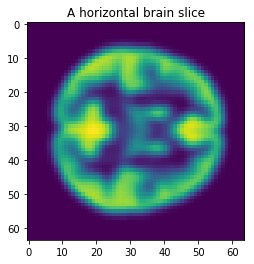

In [12]:
# imshow can visualize a 2d array (a table of numbers)
plt.imshow(horizontal_slice)
plt.title('A horizontal brain slice')

### "help()"

`help` is a very useful function in python. If you type `help(function_name)` in python, you will get some basic infomation about how to use this function. If you run the following line, you will see that `get_MNI152_template` take the dimension of x, y, and z, and then output a MNI152 template with the specified dimensions. 

In [13]:
help(get_MNI152_template)

Help on function get_MNI152_template in module utils:

get_MNI152_template(dim_x, dim_y, dim_z)
    get MNI152 template used in fmrisim
    Parameters
    ----------
    dim_x: int
    dim_y: int
    dim_z: int
        - dims set the size of the volume we want to create
    
    Return
    -------
    MNI_152_template: 3d array (dim_x, dim_y, dim_z)



### look at the source code
If you want to see the source code, you can use the `getsource` function from the `inspect` package. 

Run the following code to see the source code of `get_MNI152_template`. 

In [14]:
import inspect
# this "inspect" package can let you peek what's inside a function
source_code = inspect.getsource(get_MNI152_template)
print(source_code)

def get_MNI152_template(dim_x, dim_y, dim_z):
    """get MNI152 template used in fmrisim
    Parameters
    ----------
    dim_x: int
    dim_y: int
    dim_z: int
        - dims set the size of the volume we want to create
    
    Return
    -------
    MNI_152_template: 3d array (dim_x, dim_y, dim_z)
    """
    # Import the fmrisim from BrainIAK
    import brainiak.utils.fmrisim as sim 
    # Make a grey matter mask into a 3d volume of a given size
    dimensions = np.asarray([dim_x, dim_y, dim_z])
    _, MNI_152_template = sim.mask_brain(dimensions)
    return MNI_152_template



#### "python function"

`get_MNI152_template` is a python "function" we wrote. In general, a python function has the following structure: 

    def function_name(input_1, input_2, ..., input_m):
        some code 
        some code
        ...
        some code
        return output1, output2, ... output_n

**Exercise 1:**<a id="ex1"></a> Change the above script in at least 3 ways (examples: add a subplot of different slices, change the colors, show a histogram of values, etc.):

Text(0.5,1,'rotated image')

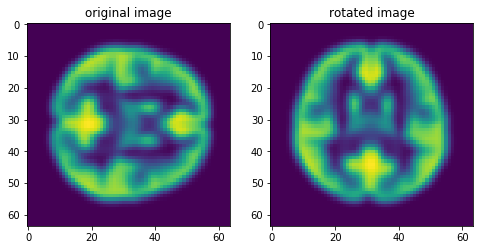

In [15]:
"""example solution: here's a function that can rotate the image"""

from scipy import ndimage

horizontal_slice_rotated = ndimage.interpolation.rotate(horizontal_slice, angle = 90)

# plot them 
f, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(horizontal_slice)
axes[0].set_title('original image')

axes[1].imshow(horizontal_slice_rotated)
axes[1].set_title('rotated image')

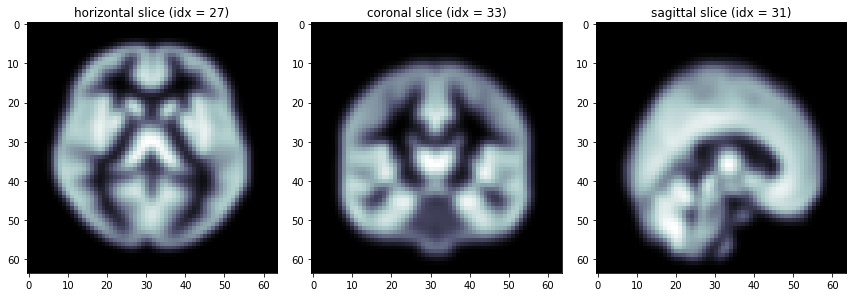

In [16]:
"""example solution: plot xyz slices"""

from scipy import ndimage

# get 3 mid slices
x_idx = 27
y_idx = 33
z_idx = 31
horizontal_slice = MNI_152_template[:, :, x_idx]
coronal_slice = MNI_152_template[:, y_idx, :]
sagittal_slice = MNI_152_template[z_idx, :, :]

# rotate the images by 90 degree, counter-clockwise 
horizontal_slice = ndimage.interpolation.rotate(horizontal_slice, angle = 90)
coronal_slice = ndimage.interpolation.rotate(coronal_slice, angle = 90)
sagittal_slice = ndimage.interpolation.rotate(sagittal_slice, angle = 90)

# plot them 
f, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].imshow(horizontal_slice, cmap='bone')
axes[0].set_title('horizontal slice (idx = %d)' % (x_idx))

axes[1].imshow(coronal_slice, cmap='bone')
axes[1].set_title('coronal slice (idx = %d)' % (y_idx))

axes[2].imshow(sagittal_slice, cmap='bone')
axes[2].set_title('sagittal slice (idx = %d)' % (z_idx))

f.tight_layout()

## Contributions<a id="contributions"></a>
  
M. Kumar, C. Ellis and N. Turk-Browne produced the initial notebook  
T. Meissner minor edits  
Q. Lu: switch to matplotlib, fix dead links, add resources, encapsulate brainiak fmrisim  